In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
x_train = np.load("X_train.npy")
y_train = np.load("Y_train.npy")
x_test = np.load("X_test.npy")
y_test = np.load("Y_test.npy")

In [64]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(126, 500, 3)
(126,)
(54, 500, 3)
(54,)


In [52]:
print(x_train.shape, x_test.shape)

(126, 500, 3) (54, 500, 3)


In [65]:
print(y_test)

[3 1 2 5 5 1 1 5 3 2 6 5 6 5 6 1 6 5 2 5 4 3 2 2 1 4 6 4 1 2 6 2 4 4 3 6 6
 3 1 5 3 2 1 4 4 4 5 1 3 3 3 6 2 4]


In [66]:
def makedataset(X, y):
    activity_dic = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}
    flat_x = X.reshape(-1, 3)
    flat_y = np.repeat(y, 500)
    #print(flat_y)
    replaced_y = [activity_dic[i] for i in flat_y]
    df = pd.DataFrame({"activity": replaced_y, "accx": flat_x[:, 0], "accy": flat_x[:, 1], "accz": flat_x[:, 2]})
    df['acc_mag_diff'] = ((df['accx']**2+df['accy']**2+df['accz']**2)-1.08)**2
    return df    

In [67]:
train_df = makedataset(x_train, y_train)
test_df = makedataset(x_test, y_test)

In [72]:
(train_df[train_df["activity"].isin(["STANDING", 'SITTING', 'LAYING'])])['acc_mag_diff'].max()

0.05985059911450343

In [4]:
flat_x_train = x_train.reshape(-1, 3)
flat_y_train = np.repeat(y_train, 500)

In [5]:
print(flat_x_train.shape, flat_y_train.shape)

(63000, 3) (63000,)


In [6]:
activity_dic = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}
replaced_y_train = [activity_dic[i] for i in flat_y_train]

In [7]:
df = pd.DataFrame({"accx": flat_x_train[:, 0], "accy": flat_x_train[:, 1], "accz": flat_x_train[:, 2], "activity": replaced_y_train})

In [8]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(df, x='accx', y='accy', z='accz',
              color='activity')
fig.show()

In [9]:
def plot_diff(feature_arr, frac=0.5, random_state = 42, size=5):
    df2 = df[(df['activity'].isin(feature_arr))]
    df2 = df2.sample(int(len(df2)*frac), random_state=random_state)
    fig = px.scatter_3d(df2, x='accx', y='accy', z='accz',
              color='activity')
    fig.update_traces(marker=dict(size=size))
    fig.show()

In [10]:
plot_diff(["LAYING", "STANDING", "SITTING"], frac=1, size=2)

In [11]:
display(df2)

NameError: name 'df2' is not defined

In [12]:
df2 = df[(df['activity'].isin(["WALKING", 'SITTING', 'STANDING']))]

In [13]:
(df2["accx"]**2+df2["accy"]**2+df2["accz"]**2).mean()

1.0827290933008205

In [14]:
df['acc_mag_diff'] = ((df["accx"]**2+df['accy']**2+df["accz"]**2)-1.0827)**2

In [17]:
display(df[df["activity"].isin(["LAYING", 'STANDING', 'SITTING'])])

accx      accy      accz activity  acc_mag_diff
500    0.253887  0.644621  0.730560   LAYING      0.004759
501    0.254741  0.647010  0.733028   LAYING      0.003826
502    0.256914  0.646808  0.735480   LAYING      0.003295
503    0.256767  0.646699  0.736910   LAYING      0.003082
504    0.258822  0.644482  0.735976   LAYING      0.003445
...         ...       ...       ...      ...           ...
61995  0.187119  0.561053  0.804261   LAYING      0.007408
61996  0.189449  0.561797  0.806681   LAYING      0.006474
61997  0.188955  0.560670  0.809995   LAYING      0.005860
61998  0.186853  0.561524  0.811341   LAYING      0.005506
61999  0.187728  0.563739  0.816337   LAYING      0.004000

[31500 rows x 5 columns]

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X_train = train_df.drop('activity', axis=1)
#X_train = X_train.drop('acc_mag_diff', axis=1)
y_train = train_df['activity']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = test_df.drop('activity', axis=1)
#X_test = X_test.drop('acc_mag_diff', axis=1)
y_test = test_df['activity']
# Create the decision tree classifier

acc_arr = []
clf = DecisionTreeClassifier(random_state=42, max_depth=7)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
acc_arr.append(accuracy)
print(accuracy)


0.6946666666666667


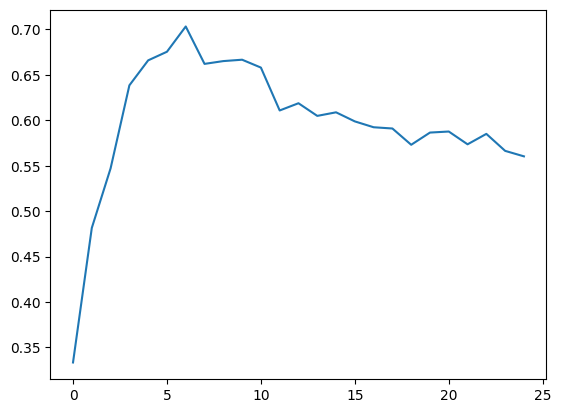

In [77]:
plt.plot(acc_arr)
plt.show()

In [51]:
display(X_test)

accx      accy      accz
0      1.196480 -0.160690 -0.740178
1      1.222030 -0.267295 -0.771748
2      1.223110 -0.433863 -0.767842
3      1.119198 -0.533790 -0.756309
4      0.915843 -0.496126 -0.629135
...         ...       ...       ...
62995  0.834664 -0.084789 -0.402108
62996  0.741997 -0.107038 -0.368874
62997  0.652846 -0.106747 -0.345863
62998  0.640395 -0.106293 -0.339603
62999  0.635090 -0.096517 -0.327336

[63000 rows x 3 columns]

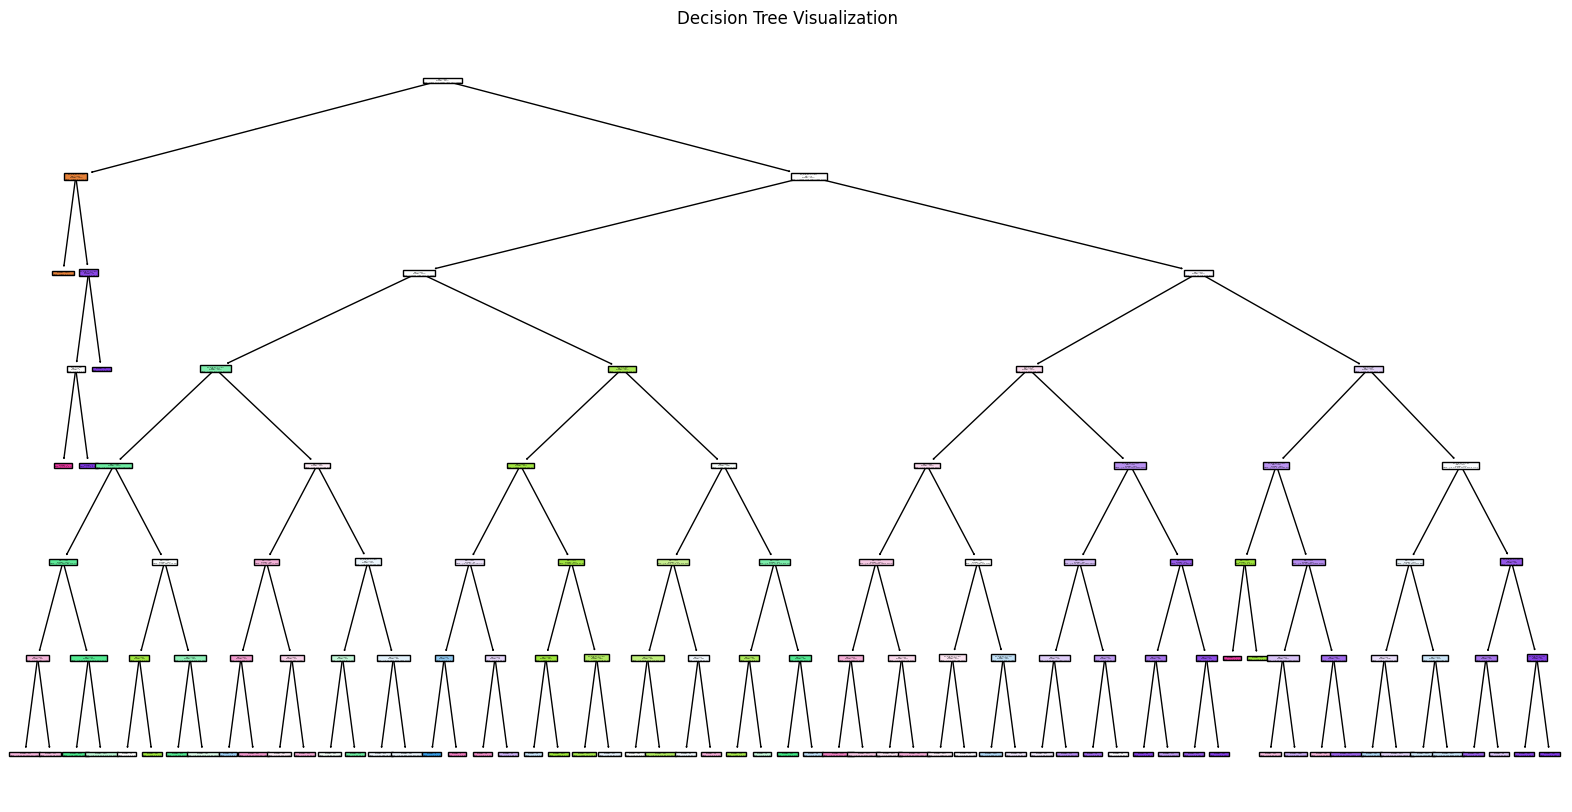

In [80]:
#Display the tree
from sklearn import tree
def decision_Tree_plot(clf, features):
    plt.figure(figsize=(20, 10))
    tree.plot_tree(clf, filled=True, feature_names=features)
    plt.title('Decision Tree Visualization')
    plt.show()

decision_Tree_plot(clf, X_train.columns)

In [81]:
clf.get_depth()

7

In [102]:
y_train

0        WALKING_UPSTAIRS
1        WALKING_UPSTAIRS
2        WALKING_UPSTAIRS
3        WALKING_UPSTAIRS
4        WALKING_UPSTAIRS
               ...       
62995    WALKING_UPSTAIRS
62996    WALKING_UPSTAIRS
62997    WALKING_UPSTAIRS
62998    WALKING_UPSTAIRS
62999    WALKING_UPSTAIRS
Name: activity, Length: 63000, dtype: object

In [96]:
y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.7315873015873016


In [101]:
len(X_train)/500

126.0

In [105]:
sig_df = pd.DataFrame()

In [109]:
y_train[500]

'LAYING'

In [118]:

# for i in range(126):
i=0
freq_dic=  {"Activity":"","WALKING": 0, "WALKING_UPSTAIRS": 0, "WALKING_DOWNSTAIRS": 0, "SITTING": 0, "STANDING": 0, "LAYING": 0}
for j in (y_pred[i*500:(i+1)*500]):
    freq_dic[j]+=1
freq_dic["Activity"] = y_train[i*500]
display(pd.DataFrame([freq_dic]))
    #pd.concat([sig_df, pd.DataFrame(freq_dic)])
    

Activity  WALKING  WALKING_UPSTAIRS  WALKING_DOWNSTAIRS  SITTING  \
0  WALKING_UPSTAIRS       64               410                  22        0   

   STANDING  LAYING  
0         4       0

In [89]:
X_train

accx      accy      accz  acc_mag_diff
0      1.196480 -0.160690 -0.740178      0.856086
1      1.222030 -0.267295 -0.771748      1.167264
2      1.223110 -0.433863 -0.767842      1.425199
3      1.119198 -0.533790 -0.756309      1.059952
4      0.915843 -0.496126 -0.629135      0.160576
...         ...       ...       ...           ...
62995  0.834664 -0.084789 -0.402108      0.045991
62996  0.741997 -0.107038 -0.368874      0.145860
62997  0.652846 -0.106747 -0.345863      0.273294
62998  0.640395 -0.106293 -0.339603      0.295137
62999  0.635090 -0.096517 -0.327336      0.313820

[63000 rows x 4 columns]

In [94]:
display(X_train.loc[0])

accx            1.196480
accy           -0.160690
accz           -0.740178
acc_mag_diff    0.856086
Name: 0, dtype: float64

In [88]:
for i in range(500):
    clf.predict(X_train.iloc[i, :])

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
feature_df = pd.DataFrame({""})